# Step1- Data analysis: Expected delivery End of Day Monday- 05/29/2023. Price $60 dollars
## **Instruction**
1. The relevant libraries to import, and the function/purpose each library is used for.
2. How to read data and deﬁne target and independent variables.
3. Plotting dependent and independent variables to observe the trends,
4. Data transformation: which include lags/leads (of up to six quarters), log form, Year-over-year
percentage change (for relevant variables).
4. For all variables from Step-4: Performing correlation analysis and plotting correlation
heatmap/correlation matrix.

# Importing Libraries

In [6]:
import pandas as pd # Imports the pandas library, which provides data structures and functions for efficient data manipulation and analysis.
import plotly.express as px # Imports the plotly express module, which is a high-level interface for creating interactive visualizations.
import seaborn as sns # Imports the seaborn library, which provides a high-level interface for creating statistical graphics.
import numpy as np # Imports the numpy library, which provides functions for mathematical operations on arrays and matrices.
import matplotlib.pyplot as plt # Imports the pyplot module from the matplotlib library, which provides functions for creating static visualizations.

In [7]:

# Read the training data from an Excel file into a DataFrame
# Reads the training data from an Excel file named 'Modeling Data-V02.xlsx' 
# and assigns it to the variable df_training. The read_excel() function is used to 
# read data from an Excel file, and the 'Training-Data' sheet is specified using the sheet_name parameter
df_training = pd.read_excel('Datasets/Modeling Data-V02.xlsx', sheet_name='Training-Data')

# Read the testing data from an Excel file into a DataFrame
# Reads the testing data from the same Excel file 'Modeling Data-V02.xlsx' 
# and assigns it to the variable df_testing. Similarly, the read_excel() 
# function is used to read data from the Excel file, and the 'Testing-Data' 
# sheet is specified using the sheet_name parameter
df_testing = pd.read_excel('Datasets/Modeling Data-V02.xlsx', sheet_name='Testing-Data')


In [8]:
# Accesses the column labeled 'DRS-Target Variable' in the training DataFrame df_training./ 100: 
# Divides the values in the 'DRS-Target Variable' column by 100
df_training['DRS-Target Variable'] = df_training['DRS-Target Variable'] /100

In [9]:
# Retrieves the first 5 rows of the DataFrame df_training and displays them.
# The head() function is a pandas DataFrame method that retrieves the 
# specified number of rows from the beginning of the DataFrame. 
# In this case, head(5) retrieves the first 5 rows. By default, 
# if no argument is provided to head(), it retrieves the first 5 rows, 
# but you can pass a different number to retrieve a different number of rows
df_training.head(5)

,Scenario Name,Date,DRS-Target Variable,Real GDP growth,Nominal GDP growth,Real disposable income growth,Nominal disposable income growth,Unemployment rate,CPI inflation rate,3-month Treasury rate,5-year Treasury yield,10-year Treasury yield,BBB corporate yield,Mortgage rate,Prime rate,Dow Jones Total Stock Market Index (Level),House Price Index (Level),Commercial Real Estate Price Index (Level),Market Volatility Index (Level)
0,Actual,2005 Q1,0.0142,4.5,7.9,-4.8,-2.5,5.3,2.0,2.5,3.9,4.4,5.2,5.8,5.4,11637.3,171.9,180.6,14.7
1,Actual,2005 Q2,0.0155,2.0,5.0,3.9,6.6,5.1,2.7,2.9,3.9,4.2,5.4,5.7,5.9,11856.7,178.8,186.3,17.7
2,Actual,2005 Q3,0.0159,3.2,7.0,1.7,6.1,5.0,6.2,3.4,4.0,4.3,5.4,5.8,6.4,12282.9,185.0,192.7,14.2
3,Actual,2005 Q4,0.0164,2.3,5.6,3.4,6.7,5.0,3.8,3.8,4.4,4.6,5.8,6.2,7.0,12497.2,190.2,199.9,16.5
4,Actual,2006 Q1,0.0160,5.5,8.5,8.3,10.6,4.7,2.1,4.4,4.6,4.7,5.8,6.2,7.4,13121.6,193.1,205.6,14.6


In [10]:
# Print the shape of the training data (number of rows and columns)
# Prints the shape of the training data, which indicates the number of 
# rows and columns in the DataFrame df_training. 
# The shape attribute of a DataFrame returns a tuple (rows, columns) 
# representing the dimensions of the DataFrame
print('Shape of Training Data (rows, columns): ', df_training.shape)

# Print the shape of the testing data (number of rows and columns)
# Prints the shape of the testing data, 
# which indicates the number of rows and columns in the DataFrame df_testing. 
# Similarly, the shape attribute is used to obtain the dimensions of the DataFrame.
print('Shape of Testing Data (rows, columns): ', df_testing.shape)


Shape of Training Data (rows, columns):  (60, 19)
Shape of Testing Data (rows, columns):  (8, 19)


# Data
## Features information
The dataset represents various economic indicators over a period of time. Here is an explanation of the columns:

1. **Scenario Name**: Indicates whether the data is actual or from a particular scenario.
2. **Date**: Represents the quarter and year for which the economic indicators are recorded.
3. **Real GDP growth**: The percentage change in the Gross Domestic Product adjusted for inflation.
4. **Nominal GDP growth**: The percentage change in the Gross Domestic Product without adjusting for inflation.
5. **Real disposable income growth**: The percentage change in disposable income adjusted for inflation.
6. **Nominal disposable income growth**: The percentage change in disposable income without adjusting for inflation.
7. **Unemployment rate**: The percentage of the labor force that is unemployed.
8. **CPI inflation rate**: The Consumer Price Index inflation rate, which measures changes in the average prices of goods and services.
9. **3-month Treasury rate**: The interest rate on 3-month Treasury bills.
10. **5-year Treasury yield**: The yield on 5-year Treasury bonds.
11. **10-year Treasury yield**: The yield on 10-year Treasury bonds.
12. **BBB corporate yield**: The yield on corporate bonds with a BBB rating.
13. **Mortgage rate**: The interest rate on mortgage loans.
14. **Prime rate**: The prime interest rate, which is the rate at which banks lend to their most creditworthy customers.
15. **Dow Jones Total Stock Market Index (Level)**: The level of the Dow Jones Total Stock Market Index, representing the  performance of the stock market.
16. **House Price Index (Level)**: The level of the House Price Index, which measures changes in residential property prices.
17. **Commercial Real Estate Price Index (Level)**: The level of the Commercial Real Estate Price Index, which measures changes in commercial property prices.
18. **Market Volatility Index (Level)**: The level of the Market Volatility Index, indicating the market's expectation of future volatility.
19. **DRS-Target Variable**: An identifier or code associated with the data.
The dataset provides information on various economic variables, allowing analysis and examination of trends, relationships, and the impact of different factors on the economy.







# Dicussion and Conclusion
**From the plots, we can observe the trends and patterns of each independent variable over time. Here are some insights that can be derived from the plots**

    1. Variable Trends: We can visually analyze the trends and fluctuations in each independent variable. This includes identifying any increasing or decreasing patterns, seasonality, or irregular movements.

    2. Correlation: By examining the plots together, we can assess the correlation between the independent variables. If two variables show similar patterns or move in the same direction over time, it suggests a positive correlation. Conversely, if two variables exhibit opposite trends, it indicates a negative correlation.

    3. Outliers: Outliers, if present, can be identified as data points that deviate significantly from the overall trend. These outliers may require further investigation and consideration when analyzing the relationship between variables.

    4. Comparison with Dependent Variable: The plots also allow us to compare the trends in the independent variables with the dependent variable (DRSFRMACBS). This helps in understanding how the independent variables may be related to the dependent variable and whether any visible patterns or relationships exist.
# Conclusion
    1. Based on the plots, the conclusion or insights drawn will depend on the specific patterns and relationships observed. It may vary from case to case. For example, if there are consistent positive trends or strong correlations between certain independent variables and the dependent variable, it suggests that those independent variables might have a significant impact on the dependent variable. On the other hand, if there are no clear trends or relationships, it may indicate a weak or non-existent relationship between the variables. Further analysis, such as statistical modeling or hypothesis testing, may be required to draw more definitive conclusions.





In [11]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Define the list of predictor features
# Defines a list called predictors that contains the names of predictor features to be plotted

predictors = [
    'Real GDP growth',
    'Nominal GDP growth',
    'Real disposable income growth',
    'Nominal disposable income growth',
    'Unemployment rate',
    'CPI inflation rate',
    '3-month Treasury rate',
    '5-year Treasury yield',
    '10-year Treasury yield',
    'BBB corporate yield',
    'Mortgage rate',
    'Prime rate',
    'Dow Jones Total Stock Market Index (Level)',
    'House Price Index (Level)',
    'Commercial Real Estate Price Index (Level)',
    'Market Volatility Index (Level)',
    'DRS-Target Variable'
]

# Count the number of independent features
#  Determines the number of features in the predictors list.
num_features = len(predictors)

# Set the number of columns and rows for subplots
#  Computes the number of columns and rows needed for the subplots based on the number of features.
num_cols = 2
num_rows = (num_features - 1) // num_cols + 1

# Create the subplots layout with titles
# Creates a subplot layout using the make_subplots function,
# specifying the number of rows, columns, and subplot titles.
# Loop through the independent features and add traces to subplots:

# Calculates the row and column indices for the current subplot.
# Selects the data for the current feature from the DataFrame.
# Creates a scatter trace for the current feature using go.Scatter.
# Adds the scatter trace to the appropriate subplot using fig.add_trace
fig = make_subplots(rows=num_rows, cols=num_cols, subplot_titles=predictors)

# Loop through the independent features and add traces to subplots
for i, feature_name in enumerate(predictors):
    # Calculate the row and column indices for the current subplot
    row = i // num_cols + 1
    col = i % num_cols + 1
    
    # Select the data for the current feature from the DataFrame
    x_data = df_training['Date']
    y_data = df_training[feature_name]
    
    # Create a scatter trace for the current feature and add it to the subplot
    scatter_trace = go.Scatter(x=x_data, y=y_data, name=feature_name)
    fig.add_trace(scatter_trace, row=row, col=col)

# Update the layout of the figure
# Updates the layout of the figure, specifying the height, width, and title.
fig.update_layout(height=1800, width=1500, title_text="Stacked Subplots")

# Display the figure
fig.show()


# Plots
The plots generated in this case show the relationship between the 'DRS-Target Variable' and each of the selected columns in the DataFrame. By visualizing the data in scatter plots, we can observe the patterns and trends between the 'DRS-Target Variable' (y-axis) and the selected columns (x-axis). Here are some potential insights we can gain from these plots:

1. **Real GDP growth**: We can observe how the 'DRS-Target Variable' varies with changes in real GDP growth. This plot can provide insights into the impact of real GDP growth on the target variable.

2. **Nominal GDP growth**: Similar to real GDP growth, this plot can reveal the relationship between the target variable and nominal GDP growth.

3. **Real disposable income growth**: By examining this plot, we can understand the association between the target variable and changes in real disposable income growth.

4. **Nominal disposable income growth**: This plot shows the relationship between the target variable and changes in nominal disposable income growth.

5. **Unemployment rate**: We can analyze the correlation between the target variable and the unemployment rate using this plot. It can help us understand the influence of unemployment on the target variable.

6. **CPI inflation rate**: By observing this plot, we can gain insights into how the target variable responds to changes in the Consumer Price Index (CPI) inflation rate.

7. **3-month Treasury rate, 5-year Treasury yield, 10-year Treasury yield**: These plots depict the relationship between the target variable and various Treasury rates/yields. They can provide insights into the impact of interest rates on the target variable.

8. **BBB corporate yield**: This plot shows the association between the target variable and the BBB corporate yield, which can provide insights into the relationship between corporate bond yields and the target variable.

9. **Mortgage rate, Prime rate**: These plots can reveal the relationship between the target variable and mortgage rates and prime rates, respectively. They can help us understand the influence of borrowing costs on the target variable.

10. **Dow Jones Total Stock Market Index (Level)**: By examining this plot, we can understand how changes in the Dow Jones Total Stock Market Index (Level) are related to the target variable.

11. **House Price Index (Level)**: This plot shows the relationship between the target variable and changes in the House Price Index (Level).

12. **Commercial Real Estate Price Index (Level)**: This plot depicts the association between the target variable and changes in the Commercial Real Estate Price Index (Level).

13. **Market Volatility Index (Level)**: This plot can provide insights into the relationship between the target variable and market volatility, as indicated by the Market Volatility Index (Level).

By analyzing these plots, we can identify any potential correlations, trends, or dependencies between the 'DRS-Target Variable' and the selected columns, which can help us understand the factors that may influence the target variable

In [12]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

df = df_training

# Extract column names excluding 'Scenario Name', 'Date', and 'DRS-Target Variable'
x_axis_columns = df.columns[3:]

# Remove rows with missing values
df = df.dropna()

# Create subplots using make_subplots
fig = make_subplots(rows=len(x_axis_columns), cols=1, subplot_titles=x_axis_columns)

# Add traces for each subplot
for i, column in enumerate(x_axis_columns, start=1):
    fig.add_trace(
        go.Scatter(x=df[column], y=df['DRS-Target Variable'], mode='markers', name=column),
        row=i, col=1
    )

    # Add axis labels for each subplot
    fig.update_xaxes(title_text=column, row=i, col=1)
    fig.update_yaxes(title_text='DRS Target Variable', row=i, col=1)

# Update the layout
fig.update_layout(height=len(x_axis_columns) * 300, showlegend=False, title_text="Dependent Variable vs. Independent Variable")

# Show the plot
fig.show()


# Transformation

In [13]:
df_transformed_training = df_training
# Step 2: Perform data transformation - Log Transformation
#  Defines a list called Defines a list called log_transform_variables 
# that contains the names of variables to be log-transformed.

log_transform_variables = ['Dow Jones Total Stock Market Index (Level)',
                            'House Price Index (Level)',
                            'Commercial Real Estate Price Index (Level)']

# Loop through the variables to be log-transformed
# Applies the natural logarithm (np.log()) to the selected variable.
# Creates a new column with the log-transformed values using
for var in log_transform_variables:
    # Apply the natural logarithm to the selected variable and create a new column with the log-transformed values
    df_transformed_training[f'log_{var}'] = np.log(df_transformed_training[var])

# Step 3: Perform data transformation - Year-over-Year Change
# Defines a list called yoy_change_variables that contains the names
# of variables for which year-over-year changes will be calculated
yoy_change_variables = ['Dow Jones Total Stock Market Index (Level)',
                        'House Price Index (Level)',
                        'Commercial Real Estate Price Index (Level)']

# Loop through the variables for year-over-year change calculation
for var in yoy_change_variables:
    # Calculate the percentage change over a four-quarter period (assuming quarterly data)
    # Creates a new column with the year-over-year change values using
    df_transformed_training[f'{var}_YOY'] = df_transformed_training[var].pct_change(4) * 100

# Step 4: Perform data transformation - Lags/Leads
# Defines the range of lags to be considered for lag/lead transformation.
lags = range(1, 7)  # Lags of up to six quarters
# Defines a list called lag_lead_variables that contains the names of variables for which lagged values will be created
lag_lead_variables = ['Unemployment rate', '10-year Treasury yield', 'Mortgage rate']

# Loop through the variables for lag/lead transformation
# Loop through the variables for lag/lead transformation
for var in lag_lead_variables:
    # Loop through the specified lags
    for lag in lags:
        # Shift the variable values by the specified lag and create new columns with lagged values
        # Shifts the variable values by the specified lag using 
        df_transformed_training[f'{var}_lag_{lag}'] = df_transformed_training[var].shift(lag)


# this code will save the transformed data into csv file in the current directory
df_transformed_training.to_csv('Transformed_dataset.csv',index=False)

# Trend Plots with Transforned Varibles

In [14]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

df = df_transformed_training

# Extract column names excluding 'Scenario Name', 'Date', and 'DRS-Target Variable'
x_axis_columns = df.columns[3:]

# Remove rows with missing values
df = df.dropna()

# Create subplots using make_subplots
fig = make_subplots(rows=len(x_axis_columns), cols=1, subplot_titles=x_axis_columns)

# Add traces for each subplot
for i, column in enumerate(x_axis_columns, start=1):
    fig.add_trace(
        go.Scatter(x=df[column], y=df['DRS-Target Variable'], mode='markers', name=column),
        row=i, col=1
    )

    # Add axis labels for each subplot
    fig.update_xaxes(title_text=column, row=i, col=1)
    fig.update_yaxes(title_text='DRS Target Variable', row=i, col=1)

# Update the layout
fig.update_layout(height=len(x_axis_columns) * 300, showlegend=False, title_text="Dependent Variable vs. Independent Variable")

# Show the plot
fig.show()


# HeatMap/Correlation of UnTransformed Variables
The correlation heatmap provides visual information about the correlation between the selected columns in your DataFrame. Here's how you can interpret the information from the plot:

* The heatmap consists of a grid of squares, where each square represents the correlation between two variables. The color of each square represents the strength and direction of the correlation.

    * Darker shades (e.g., dark blue) indicate a strong negative correlation, meaning that as one variable increases, the other variable tends to decrease.
    * Lighter shades (e.g., light blue) indicate a weak negative correlation.
    * Lighter shades of a different color (e.g., light red) indicate a weak positive correlation, where the variables tend to increase or decrease together.
    * Darker shades of a different color (e.g., dark red) indicate a strong positive correlation, meaning that as one variable increases, the other variable tends to increase as well.
* The numbers within each square represent the correlation coefficient, which quantifies the strength and direction of the correlation. The coefficient ranges from -1 to 1.

    *  A correlation coefficient of -1 indicates a perfect negative correlation.
    * A correlation coefficient of 0 indicates no correlation.
    * A correlation coefficient of 1 indicates a perfect positive correlation.
    * The diagonal line of squares represents the correlation of each variable with itself, which is always 1.

By examining the heatmap, you can identify patterns of correlation between the selected variables. Strong correlations, whether positive or negative, are indicated by the darker shades. Weak or no correlations are indicated by the lighter shades or values closer to 0.

This information can help you understand the relationships between variables in your dataset and identify potential multicollinearity or dependencies among the variables.

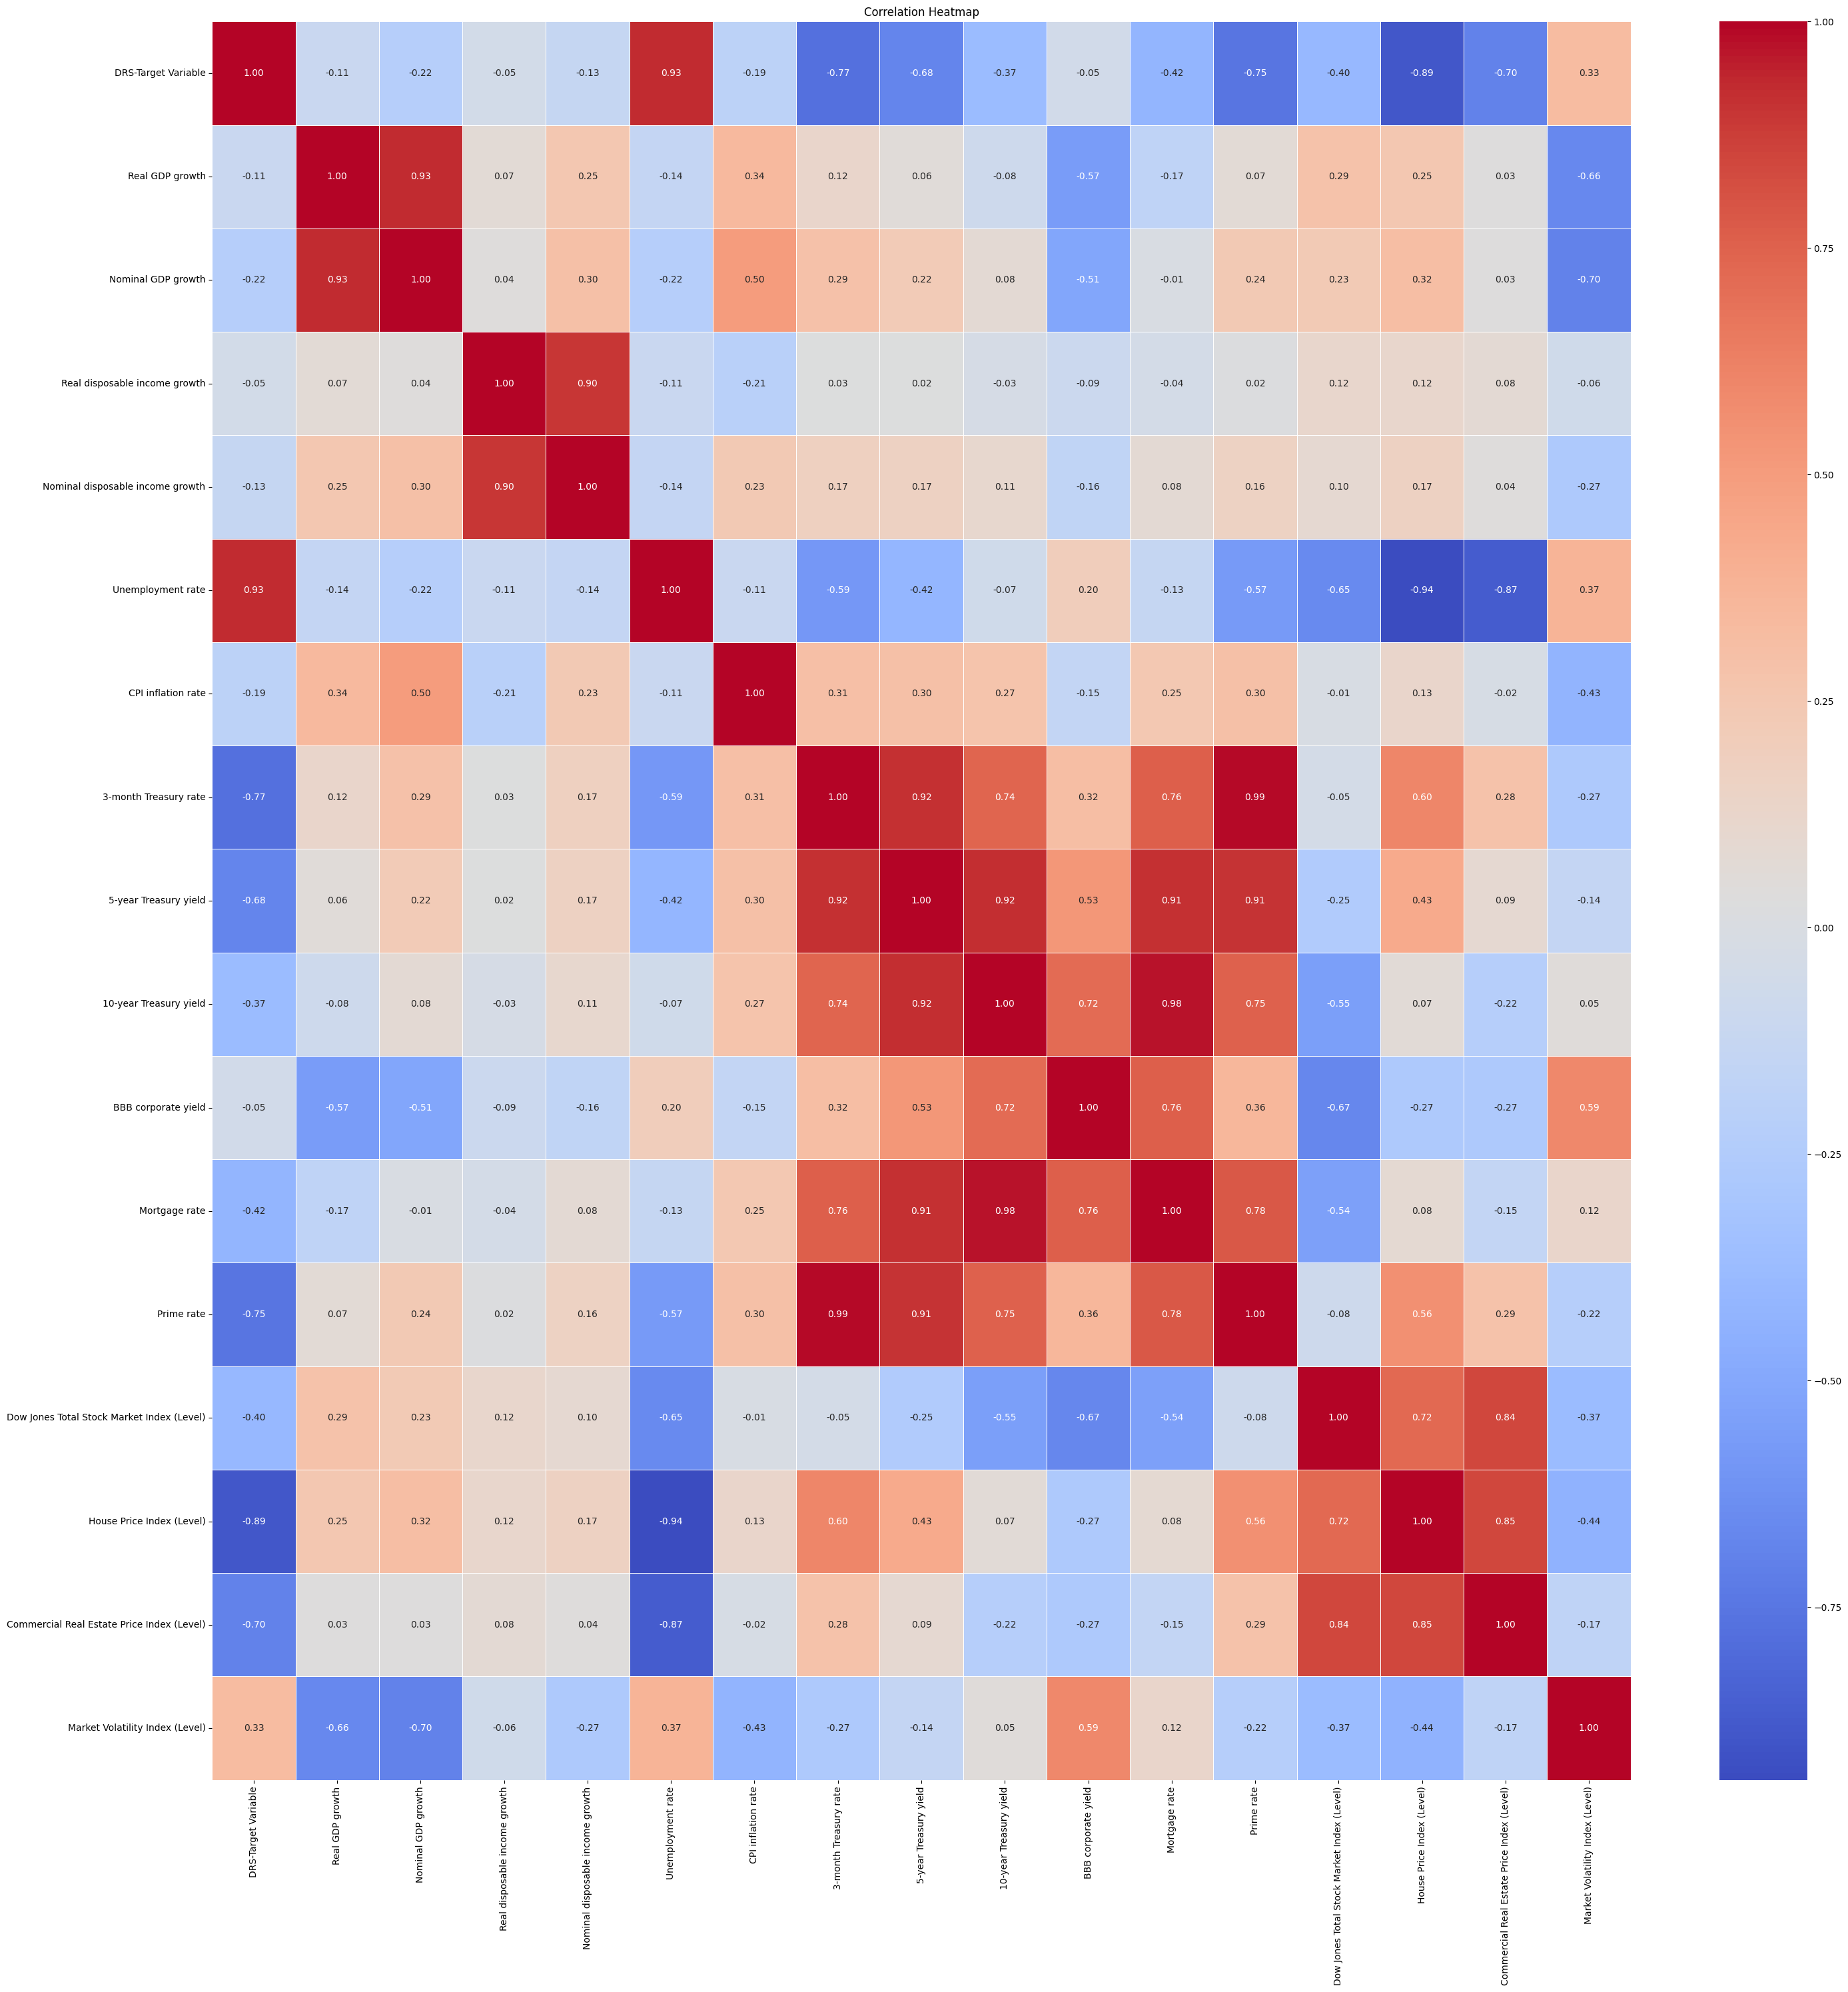

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Define the specific columns for correlation analysis
columns_of_interest =[
                    'DRS-Target Variable',
                    'Real GDP growth',
                    'Nominal GDP growth',
                    'Real disposable income growth',
                    'Nominal disposable income growth',
                    'Unemployment rate',
                    'CPI inflation rate',
                    '3-month Treasury rate',
                    '5-year Treasury yield',
                    '10-year Treasury yield',
                    'BBB corporate yield',
                    'Mortgage rate',
                    'Prime rate',
                    'Dow Jones Total Stock Market Index (Level)',
                    'House Price Index (Level)',
                    'Commercial Real Estate Price Index (Level)',
                    'Market Volatility Index (Level)'
                    ]

# Step 3: Subset the DataFrame to include only the columns of interest
numeric_df = df_training[columns_of_interest]

# Step 4: Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Step 5: Plot the correlation heatmap using seaborn
plt.figure(figsize=(30, 30))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


# HeatMap/Correlation of with Transformed Variables

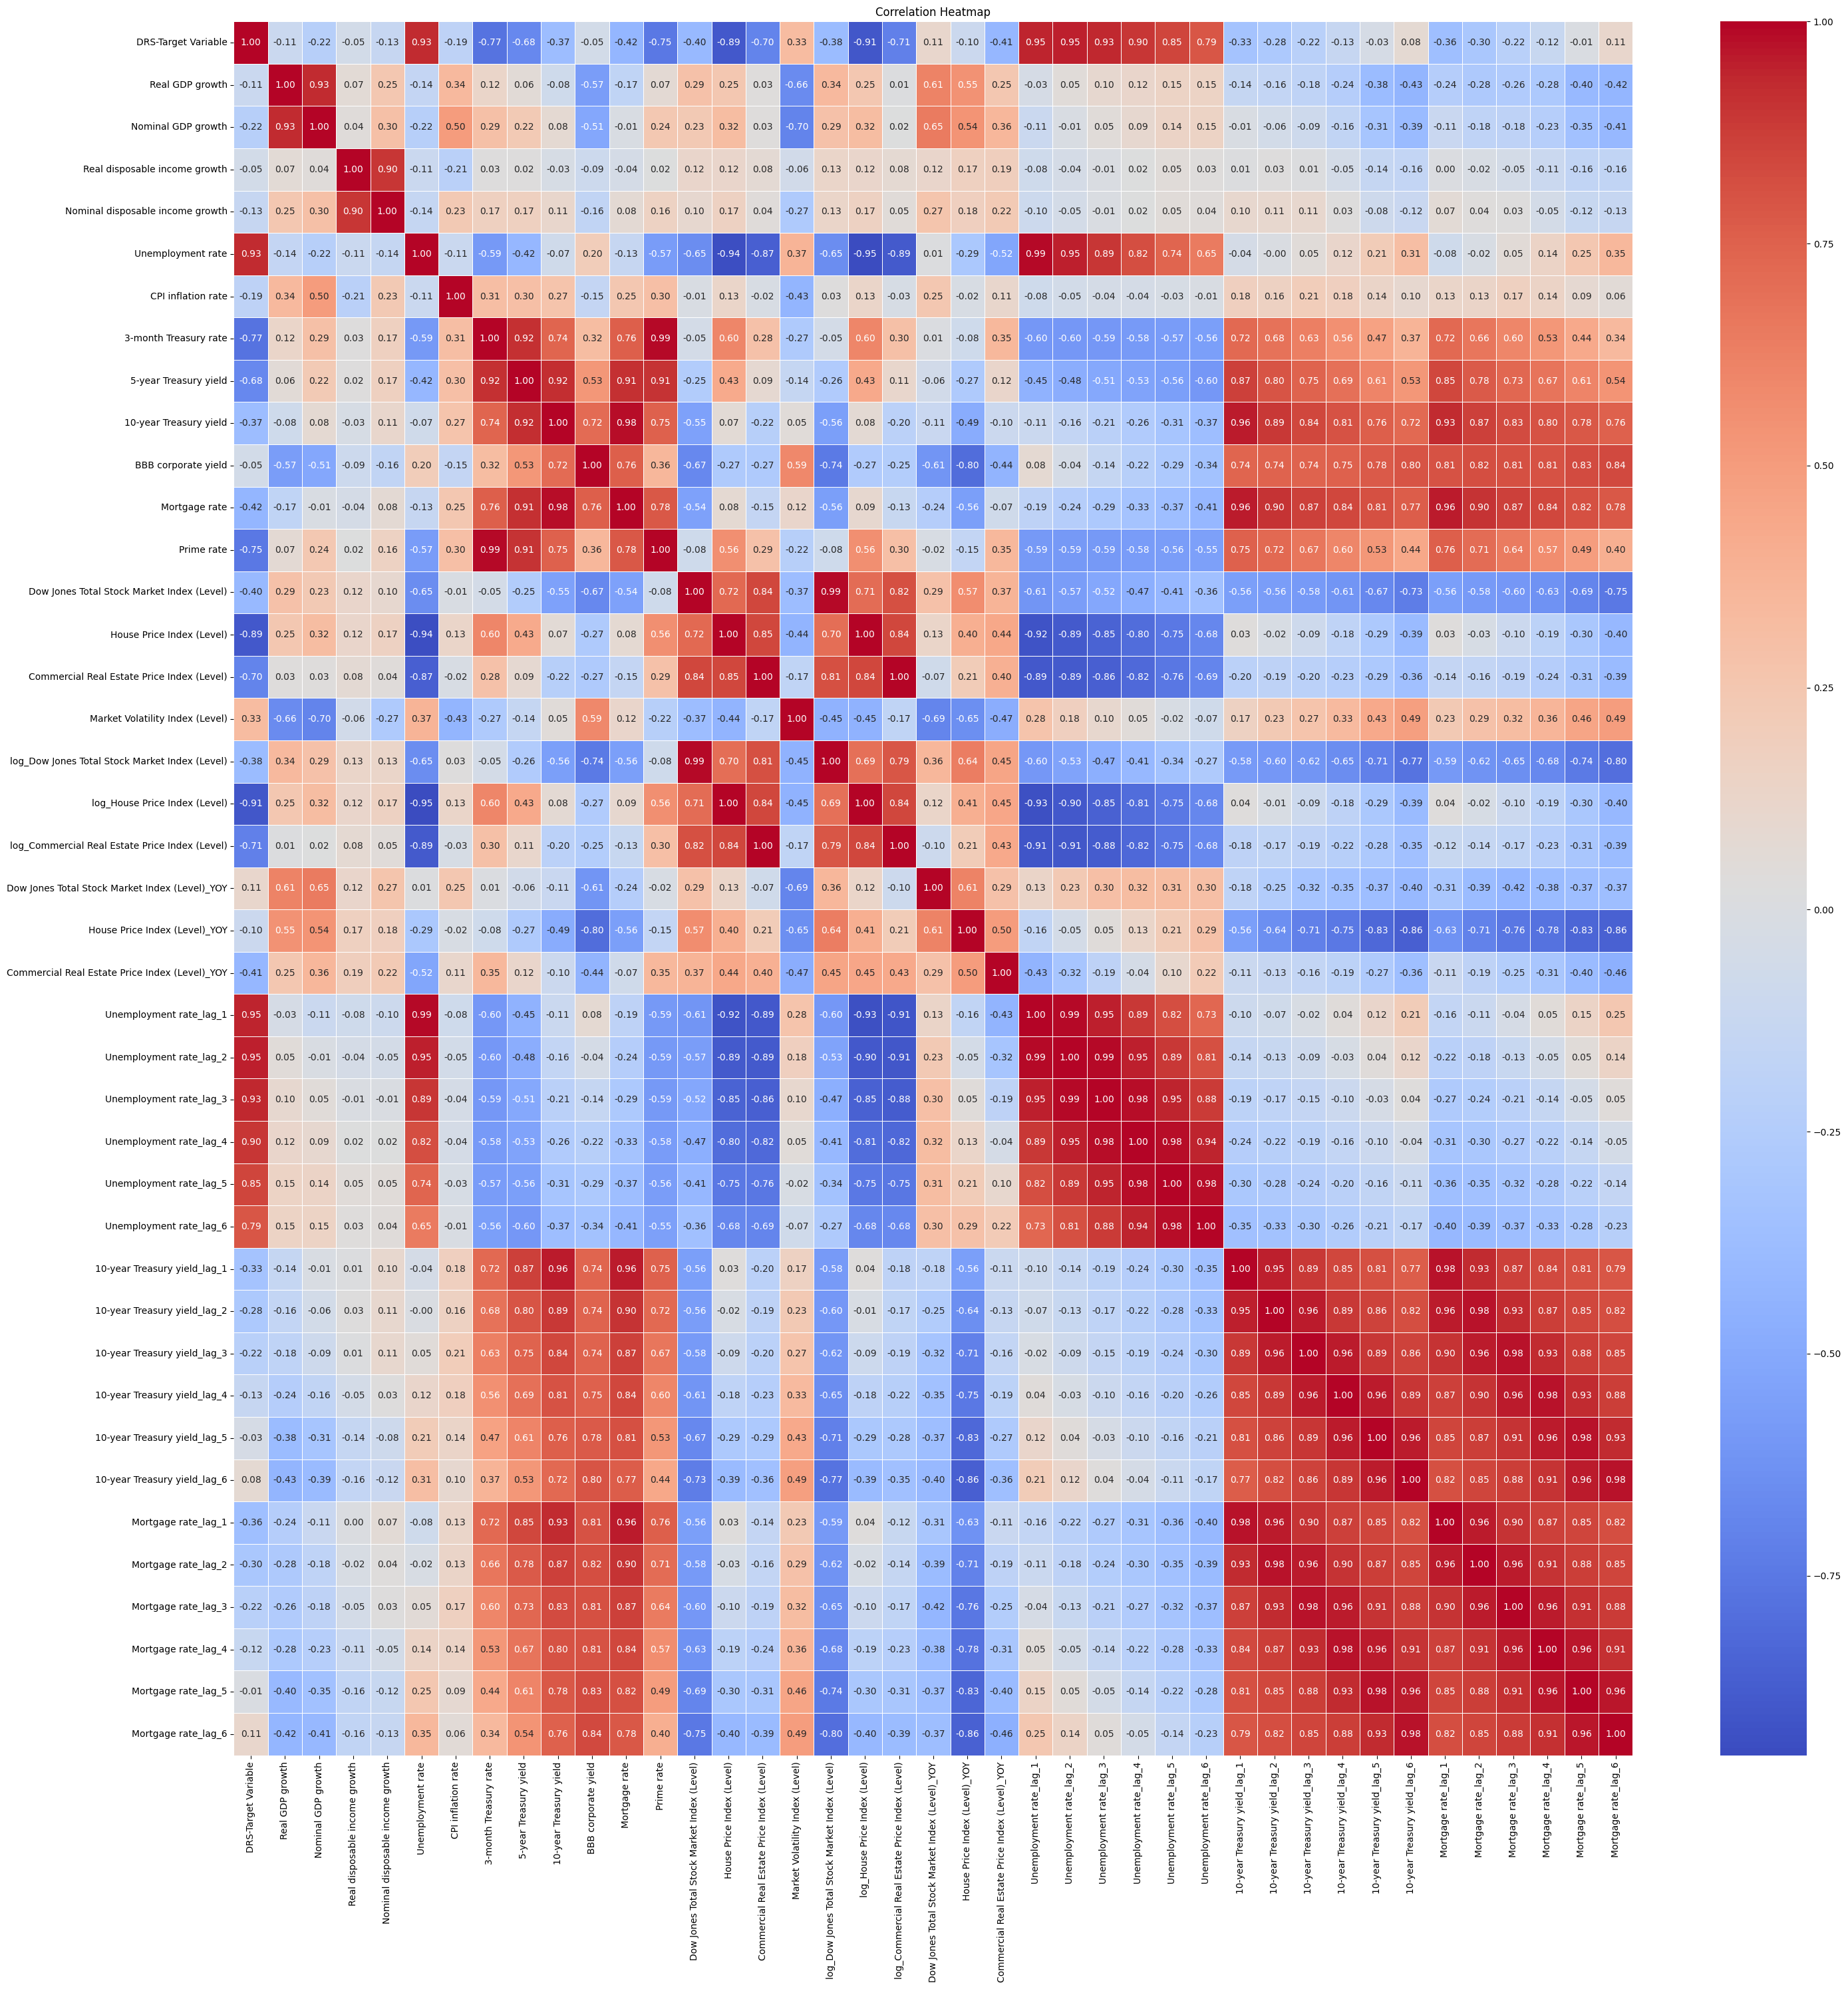

In [16]:
import pandas as pd
import plotly.express as px
import seaborn as sns

# Step 2: Exclude text-type columns from correlation analysis
# Select columns with numeric data types (float64 and int64)
numeric_columns = df_training.select_dtypes(include=['float64', 'int64']).columns

# Subset the DataFrame to include only the numeric columns
numeric_df = df_training[numeric_columns]

# Step 3: Calculate the correlation matrix
# Compute the correlation coefficients between all pairs of numeric variables
correlation_matrix = numeric_df.corr()

# Step 4: Plot the correlation heatmap using seaborn
# Set the figure size
plt.figure(figsize=(30, 30))

# Create a heatmap of the correlation matrix
# Annotate the heatmap with correlation values
# Use the 'coolwarm' color map for visualizing correlations
# Set the format of annotations to two decimal places
# Set the width of the lines separating the cells in the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Set the title of the heatmap
plt.title('Correlation Heatmap')

# Adjust the layout of the plot to prevent overlapping of elements
plt.tight_layout()

# Display the correlation heatmap
plt.show()


# Trend Plots(That has high correlation with Target Variable)

In [17]:
import plotly.subplots as sp
import plotly.graph_objects as go
from plotly.subplots import make_subplots


df = df_training
# Calculate the correlation between numeric columns and the 'DRS-Target Variable'
numeric_columns = df.select_dtypes(include='number').columns
correlation = df[numeric_columns].corr()['DRS-Target Variable']

# Define the correlation threshold for selecting columns
correlation_threshold = 0.5

# Select the columns with correlation above the threshold
selected_columns = correlation[correlation.abs() > correlation_threshold].index.tolist()
print('Names of the features that has high correlation : \n',selected_columns)
# Remove rows with missing values
df = df.dropna()

# Create subplots using make_subplots
fig = make_subplots(rows=len(selected_columns), cols=1, subplot_titles=selected_columns)

# Add traces for each subplot
for i, column in enumerate(selected_columns, start=1):
    fig.add_trace(
        go.Scatter(x=df[column], y=df['DRS-Target Variable'], mode='markers', name=column),
        row=i, col=1
    )

    # Add axis labels for each subplot
    fig.update_xaxes(title_text=column, row=i, col=1)
    fig.update_yaxes(title_text='DRS Target Variable', row=i, col=1)

# Update the layout
fig.update_layout(height=len(selected_columns) * 300, showlegend=False, title_text="Dependent Variable vs. Independent Variable")

# Show the plot
fig.show()



Names of the features that has high correlation : 
 ['DRS-Target Variable', 'Unemployment rate', '3-month Treasury rate', '5-year Treasury yield', 'Prime rate', 'House Price Index (Level)', 'Commercial Real Estate Price Index (Level)', 'log_House Price Index (Level)', 'log_Commercial Real Estate Price Index (Level)', 'Unemployment rate_lag_1', 'Unemployment rate_lag_2', 'Unemployment rate_lag_3', 'Unemployment rate_lag_4', 'Unemployment rate_lag_5', 'Unemployment rate_lag_6']


# Step-2
ignore from this one beyond its under-development

In [19]:
list(df_testing)

['Scenario Name',
 'Date',
 'DRS-Target Variable',
 'Real GDP growth',
 'Nominal GDP growth',
 'Real disposable income growth',
 'Nominal disposable income growth',
 'Unemployment rate',
 'CPI inflation rate',
 '3-month Treasury rate',
 '5-year Treasury yield',
 '10-year Treasury yield',
 'BBB corporate yield',
 'Mortgage rate',
 'Prime rate',
 'Dow Jones Total Stock Market Index (Level)',
 'House Price Index (Level)',
 'Commercial Real Estate Price Index (Level)',
 'Market Volatility Index (Level)']

In [20]:
# import statsmodels.api as sm
# import statsmodels.formula.api as smf


# predictors = df_testing[[
#                         'Real GDP growth',
#                         'Nominal GDP growth',
#                         'Real disposable income growth',
#                         'Nominal disposable income growth',
#                         'Unemployment rate',
#                         'CPI inflation rate',
#                         '3-month Treasury rate',
#                         '5-year Treasury yield',
#                         '10-year Treasury yield',
#                         'BBB corporate yield',
#                         'Mortgage rate',
#                         'Prime rate',
#                         'Dow Jones Total Stock Market Index (Level)',
#                         'House Price Index (Level)',
#                         'Commercial Real Estate Price Index (Level)',
#                         'Market Volatility Index (Level)'
#                         ]]
# target_variable = df_testing['DRS-Target Variable']
# gauss_log = sm.GLM(target_variable, predictors, family=sm.families.Gaussian(sm.families.links.Log()))
# gauss_log_results = gauss_log.fit()
# print(gauss_log_results.summary())